# Pasikliautinio intervalo (CI) skaičiavimas – praktinis pavyzdys

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_california_housing
import pandas as pd
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3)   # max 3 digits after decimal

data = fetch_california_housing()
X = data.data
y = data.target


## 1. Formulė ir funkcija

In [ ]:

def ci_t_mean(x, alpha=0.05):
    from scipy import stats
    import numpy as np
    if isinstance(x, dict) and all(k in x for k in ('xbar','s','n')):
        xbar, s, n = float(x['xbar']), float(x['s']), int(x['n'])
    elif isinstance(x, (list, tuple, np.ndarray)) and len(x) == 3 and np.isscalar(x[0]):
        xbar, s, n = float(x[0]), float(x[1]), int(x[2])
    else:
        data = np.asarray(x, dtype=float)
        data = data[~np.isnan(data)]
        n = data.size
        xbar = data.mean()
        s = data.std(ddof=1)
    tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
    SE = s / np.sqrt(n)
    ME = tcrit * SE
    lo, hi = xbar - ME, xbar + ME
    return lo, hi, xbar, s, n, tcrit, SE, ME

result = ci_t_mean(y)
result


(np.float64(2.0528144249335036),
 np.float64(2.0843019132447913),
 np.float64(2.0685581690891475),
 np.float64(1.1539561587441385),
 20640,
 np.float64(1.9600789323569),
 np.float64(0.008032199058796548),
 np.float64(0.015743744155644033))

# 🔎 Paaiškinimai

- **`lo`** – *apatinė CI riba*  
  Žemiausia reikšmė, kurioje, tikėtina, gali būti tikrasis populiacijos vidurkis.  

- **`hi`** – *viršutinė CI riba*  
  Aukščiausia reikšmė, kurioje, tikėtina, gali būti tikrasis populiacijos vidurkis.  

- **`xbar` ( \(\bar{x}\) )** – *imties vidurkis*  
  Tai, ką apskaičiuojame tiesiogiai iš turimų duomenų.  

- **`s`** – *imties standartinis nuokrypis*  
  Parodo, kiek duomenys išsisklaido aplink vidurkį.  

- **`n`** – *imties dydis*  
  Kiek yra stebėjimų (duomenų taškų).  

- **`tcrit`** – *kritinė t reikšmė*  
  Ribinė reikšmė iš Student t-skirstinio, priklausanti nuo α (pvz., 0.05) ir laisvės laipsnių (df = n-1).  

- **`SE` (Standard Error)** – *standartinė paklaida*  
  \[
  SE = \frac{s}{\sqrt{n}}
  \]  
  Rodo, kiek svyruotų imties vidurkis, jei imtumėme daug imčių iš tos pačios populiacijos.  

- **`ME` (Margin of Error)** – *paklaidos dydis*  
  \[
  ME = t_{\text{crit}} \cdot SE
  \]  
  Kiek ± nuo vidurkio reikia eiti, kad gautume CI ribas. 

  👉 **Pavyzdys (žmonių ūgio duomenys):**

- x/ = 175 cm 
- s = 10 cm
- n = 25
- **95% CI → lo = 171.0, hi = 179.0**

---

✅ **Interpretacija:**  
Su 95% tikimybe tikrasis **populiacijos vidurkis** yra tarp **171 ir 179 cm**.   

In [ ]:
def ci_t_mean_simple(x, alpha=0.05): #   alpha : float, optional
                                     #   Significance level (default=0.05 → 95% CI).
    from scipy import stats
    import numpy as np
    
    data = np.asarray(x, dtype=float)   #array-like
                                        #Sample data (list, numpy array, or pandas Series)
    data = data[~np.isnan(data)]   # pašalinam NaN, jei yra

    n = data.size
    xbar = data.mean()
    s = data.std(ddof=1)
    # kritinė t reikšmė
    tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
     # standartinė paklaida
    SE = s / np.sqrt(n)
    # paklaidos dydis
    ME = tcrit * SE
    # CI ribos
    lo, hi = xbar - ME, xbar + ME
    
    return lo, hi, xbar, s, n, tcrit, SE, ME

result = ci_t_mean_simple(y)
result
lo, hi, xbar, s, n, tcrit, SE, ME = result
# Put them in a DataFrame
results = pd.DataFrame({
    "Metric": [
        "Sample mean (x̄)", 
        "Std deviation (s)", 
        "Sample size (n)", 
        "t critical (tcrit)", 
        "Std Error (SE)", 
        "Margin of Error (ME)", 
        "CI lower bound (lo)", 
        "CI upper bound (hi)"
    ],
    "Value": [xbar, s, n, tcrit, SE, ME, lo, hi]
})

results["Value"] = results["Value"]
results

,Metric,Value
0,Sample mean (x̄),2.069
1,Std deviation (s),1.154
2,Sample size (n),20640.000
3,t critical (tcrit),1.960
4,Std Error (SE),0.008
5,Margin of Error (ME),0.016
6,CI lower bound (lo),2.053
7,CI upper bound (hi),2.084


In [ ]:
print(f"Apatinė riba (lo): {lo:.3f}")
print(f"Viršutinė riba (hi): {hi:.3f}")
print(f"Imties vidurkis (x̄): {xbar:.3f}")
print(f"Imties standartinis nuokrypis (s): {s:.3f}")
print(f"Imties dydis (n): {n}")
print(f"Kritinė t reikšmė (tcrit): {tcrit:.3f}")
print(f"Standartinė paklaida (SE): {SE:.3f}")
print(f"Paklaidos dydis (ME): {ME:.3f}")

Apatinė riba (lo): 2.053
Viršutinė riba (hi): 2.084
Imties vidurkis (x̄): 2.069
Imties standartinis nuokrypis (s): 1.154
Imties dydis (n): 20640
Kritinė t reikšmė (tcrit): 1.960
Standartinė paklaida (SE): 0.008
Paklaidos dydis (ME): 0.016


# 🔎 Ką tai reiškia

1. **`stats.t`**  
   Reiškia **Student t-skirstinį**.

2. **`ppf`**  
   = *percent point function* – tai yra kumuliacinės skirstinio funkcijos (CDF) atvirkštinė funkcija.  
   👉 Paprastai tariant: duota tikimybė, ji grąžina **t reikšmę (kritinę reikšmę)** pagal tą tikimybę.  
   (Tarsi *„kokia t riba palieka tiek tikimybės uodegose?“*).

3. **`1 - alpha/2`**  
   Kadangi pasikliautiniai intervalai yra dvišaliai, α daliname į dvi uodegas.  
   Pavyzdys:  
   - 95% PI atveju α = 0.05  
   - Kiekvienoje uodegoje po 0.025  
   - Todėl ieškome ribos ties 1 – 0.025 = 0.975 kvantiliu.

4. **`df = n-1`**  
   Laisvės laipsniai t-skirstiniui = imties dydis − 1.  
   (Nes dispersija vertinama pagal imtį, o ne populiaciją.)

---

# 📘 Interpretacija

`tcrit` yra **kritinė t reikšmė**, kuria padauginame standartinę paklaidą (SE), kad sudarytume pasikliautinį intervalą.

**Vidurkio PI formulė:**

\[
\bar{x} \;\pm\; t_{\text{krit}} \cdot \frac{s}{\sqrt{n}}
\]

---

# 🔢 Pavyzdys

Jeigu n = 20 ir α = 0.05:

```python
from scipy import stats

tcrit = stats.t.ppf(0.975, df=19)
print(tcrit)  # → apie 2.093

## 2. Pardavimų pavyzdys (x̄=12 500, s=1 000, n=20)

In [ ]:

xbar = 12500; s = 1000; n = 20

lo, hi, xbar_, s_, n_, tcrit, SE, ME = ci_t_mean({'xbar':xbar, 's':s, 'n':n})

# Put them in a DataFrame
results = pd.DataFrame({
    "Metric": [
        "Sample mean (x̄)", 
        "Std deviation (s)", 
        "Sample size (n)", 
        "t critical (tcrit)", 
        "Std Error (SE)", 
        "Margin of Error (ME)", 
        "CI lower bound (lo)", 
        "CI upper bound (hi)"
    ],
    "Value": [xbar_, s, n, tcrit, SE, ME, lo, hi]
})

results["Value"] = results["Value"]
results


,Metric,Value
0,Sample mean (x̄),12500.000
1,Std deviation (s),1000.000
2,Sample size (n),20.000
3,t critical (tcrit),2.093
4,Std Error (SE),223.607
5,Margin of Error (ME),468.014
6,CI lower bound (lo),12031.986
7,CI upper bound (hi),12968.014


## 3. Grafikas: vidurkis + 95% CI

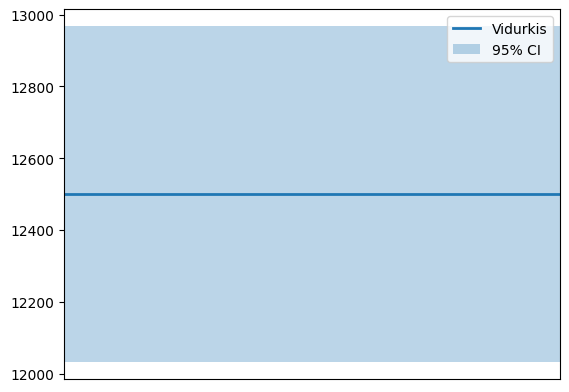

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([0,1],[xbar,xbar], lw=2, label='Vidurkis')
ax.fill_between([0,1],[lo,lo],[hi,hi], alpha=0.30, label='95% CI')
ax.set_xlim(0,1); ax.set_xticks([])
ax.legend(); plt.show()


## 4. 90% ir 99% CI palyginimas

In [ ]:

from scipy import stats
def ci_bounds(xbar, s, n, alpha):
    tcrit = stats.t.ppf(1-alpha/2, df=n-1)
    SE = s/np.sqrt(n); ME = tcrit*SE
    return xbar-ME, xbar+ME
lo90, hi90 = ci_bounds(xbar, s, n, 0.10)
lo99, hi99 = ci_bounds(xbar, s, n, 0.01)
print('90%:', lo90, hi90); print('99%:', lo99, hi99)


90%: 12113.35414913129 12886.64585086871
99%: 11860.275574079638 13139.724425920362


In [ ]:
def ci_bounds(xbar, s, n, alpha):
    """Calculate CI bounds for a given alpha level."""
    tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
    SE = s / np.sqrt(n)
    ME = tcrit * SE
    return xbar - ME, xbar + ME

# Example values
xbar, s, n = 12500, 1000, 20

# Different confidence levels
for alpha, level in [(0.10, 90), (0.05, 95), (0.01, 99)]:
    lo, hi = ci_bounds(xbar, s, n, alpha)
    print(f"🔹 {level}% CI: [{lo:,.2f}  ,  {hi:,.2f}]")

🔹 90% CI: [12,113.35  ,  12,886.65]
🔹 95% CI: [12,031.99  ,  12,968.01]
🔹 99% CI: [11,860.28  ,  13,139.72]


## 5. Bendra funkcija bet kokiems duomenims

In [ ]:

your_data = [12500,12000,13300,11800,12900,12650,13050,12200,12750,11950,12300,13100,12450,12800,12150,13200,11750,13400,12600,12950]
lo_u, hi_u, xbar_u, s_u, n_u, *_ = ci_t_mean(your_data)
print('n=', n_u, 'xbar=', xbar_u, 's=', s_u, 'CI=', (lo_u, hi_u))


n= 20 xbar= 12590.0 s= 505.13156181022987 CI= (np.float64(12353.591151935423), np.float64(12826.408848064577))


## Chi-squared test

In [ ]:
import numpy as np 
from scipy.stats import chi2_contingency
table = np.array([[233, 81],  # moterys: [išgyveno, ne]            
                [109, 468]]) # vyrai: [išgyveno, ne]
chi2, p, dof, expected = chi2_contingency(table)
print(chi2, p, dof)
print(expected)


260.71702016732104 1.197357062775565e-58 1
[[120.525 193.475]
 [221.475 355.525]]
